# Reto Entrega 2: Exploración y visualización de datos

In [1]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_1 = pd.read_excel('data/raw/Base de datos maquinados placas de cobre.xlsx', sheet_name='2024')
df_2 = pd.read_excel('data/raw/Base de datos maquinados placas de cobre.xlsx', sheet_name='2025')

df_1['Year'] = 2024
df_2['Year'] = 2025

df = pd.concat([df_1, df_2])

In [3]:
df

,ID,No. Placa,Fabricante,Molde,Lado,I1,I2,I5,I6,I7,...,F29,F30,F31,F32,F33,F34,F35,F36,PEF,Year
0,2024001,42234,KME,1,F,161.59226,161.56686,161.55416,161.55924,161.59226,...,161.14776,161.14776,161.12236,161.11728,161.08680,161.07918,161.07918,161.07918,22.125172,2024
1,2024002,42233,KME,1,M,161.82340,161.79800,161.55670,161.86150,161.86150,...,161.33826,161.33826,161.31540,161.31540,161.31540,161.31540,161.31540,161.31540,22.323564,2024
2,2024003,44740,CONOVA,1,F,164.06368,164.13988,164.13988,164.16528,164.11448,...,163.95446,163.93414,163.97732,163.96462,163.96462,163.96462,163.95446,163.93414,24.964076,2024
3,2024004,44739,CONOVA,1,M,164.15766,164.15766,164.07638,164.09670,164.15004,...,163.81476,163.81476,163.80968,163.80968,163.80968,163.80968,163.80968,163.78428,24.810859,2024
4,2024005,44740,CONOVA,1,F,163.81480,163.76862,163.76762,163.70592,163.76824,...,163.42614,163.41344,163.45916,163.43884,163.43122,163.42614,163.42614,163.42360,24.435937,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2025034,LTERNIUM B01-16,PRIMETALS,6,M,164.10940,163.90620,163.85540,164.03320,163.98240,...,163.31438,163.31692,163.34232,163.33216,163.31946,163.31946,163.31946,163.31946,24.306579,2025
34,2025035,44856,CONOVA,7,F,164.45484,164.41928,164.40658,164.41420,164.38372,...,163.44900,163.44900,163.42360,163.42360,163.42360,163.42360,163.44900,163.44900,24.428952,2025
35,2025036,45620,CONOVA,7,M,164.23640,164.08400,164.23640,164.28720,164.25926,...,164.02558,164.03828,164.02050,164.02812,164.01796,164.01542,164.02558,164.04082,25.031476,2025
36,2025037,44856,CONOVA,7,F,163.52520,163.44900,163.55060,163.60140,163.42360,...,162.75558,162.75558,162.74796,162.75304,162.75812,162.76320,162.76320,162.76320,23.743878,2025


## Data Cleaning

In [4]:
df.isnull().sum()

ID            0
No. Placa     0
Fabricante    0
Molde         0
Lado          0
             ..
F34           0
F35           0
F36           0
PEF           0
Year          0
Length: 64, dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Descriptive Statistics

In [6]:
sub = df.loc[:, ~df.columns.str.startswith('I') & ~df.columns.str.startswith('F')]
sub.describe()

,Molde,PEI,PEF,Year
count,128.000000,128.000000,128.000000,128.000000
mean,3.921875,23.003205,22.518527,2024.296875
std,2.025854,2.270662,3.221934,0.458676
min,1.000000,18.206587,17.610685,2024.000000
25%,2.000000,21.116225,20.587406,2024.000000
50%,4.000000,23.487701,22.668415,2024.000000
75%,6.000000,24.811561,24.362527,2025.000000
max,7.000000,33.213996,48.769409,2025.000000


In [7]:
df.loc[:, df.columns.str.startswith('F')].describe()

,F1,F2,F5,F6,F7,F8,F11,F12,F13,F14,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,161.321751,161.306644,161.298949,161.303437,161.317264,161.306031,161.299089,161.300437,161.313055,161.305023,...,161.305304,161.302210,161.303376,161.297105,161.315781,161.301149,167.248933,161.290142,161.293136,161.293075
std,2.212768,2.215179,2.216342,2.208408,2.214392,2.214913,2.216509,2.219414,2.220251,2.212318,...,2.214787,2.215422,2.212432,2.217083,2.217988,2.218250,67.323682,2.220603,2.218634,2.218159
min,156.578300,156.578300,156.578300,156.578300,156.563060,156.563060,156.563060,156.563060,156.563060,156.573220,...,156.624020,156.624020,156.618940,156.573220,156.596080,156.591000,156.593540,156.593540,156.585920,156.591000
25%,159.623125,159.614235,159.583755,159.575500,159.620585,159.614235,159.576770,159.571055,159.618045,159.612965,...,159.594550,159.583120,159.564070,159.548195,159.609155,159.604075,159.592645,159.564070,159.588200,159.548195
50%,161.637980,161.641790,161.688780,161.665920,161.641790,161.644330,161.678620,161.659570,161.622740,161.626550,...,161.636710,161.644330,161.669730,161.655760,161.664650,161.624010,161.654490,161.637980,161.667190,161.657030
75%,163.302950,163.283265,163.285170,163.288980,163.326445,163.290885,163.297870,163.296600,163.315015,163.290885,...,163.315015,163.306760,163.314380,163.315015,163.315650,163.295965,163.330890,163.298505,163.298505,163.298505
max,164.282120,164.274500,164.256720,164.246560,164.277040,164.264340,164.251640,164.457380,164.271960,164.261800,...,164.249100,164.246560,164.251640,164.251640,164.274500,164.259260,922.568640,164.249100,164.251640,164.256720


In [8]:
df.loc[:, df.columns.str.startswith('I')].describe()

,ID,I1,I2,I5,I6,I7,I8,I11,I12,I13,...,I27,I28,I29,I30,I31,I32,I33,I34,I35,I36
count,1.280000e+02,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.024335e+06,162.014480,161.953374,161.922880,161.965209,161.982289,161.859187,161.858745,161.921526,161.952396,...,161.932820,161.922992,161.878597,161.933248,161.970846,161.910292,161.958207,161.956033,161.902156,161.954760
std,4.473258e+02,2.102882,2.094117,2.091996,2.098485,2.092519,2.082467,2.093233,2.092375,2.065021,...,2.070094,2.074726,2.108834,2.084487,2.089744,2.108266,2.110494,2.102374,2.115893,2.097911
min,2.024001e+06,157.276800,157.276800,156.824680,157.251400,157.266640,157.281880,156.875480,157.256480,157.319980,...,157.281880,156.951680,156.926280,157.307280,157.256480,157.185360,157.256480,157.243780,157.099000,157.266640
25%,2.024033e+06,160.173670,160.093660,160.087310,160.135570,160.169225,160.173670,160.150175,160.134935,160.133030,...,160.139380,160.120330,160.050480,160.140015,160.166050,160.075880,160.114615,160.152080,160.108900,160.130490
50%,2.024064e+06,162.532060,162.452050,162.449510,162.507930,162.496500,162.307270,162.416490,162.443160,162.474910,...,162.424110,162.373310,162.350450,162.454590,162.460940,162.370770,162.435540,162.435540,162.354260,162.422840
75%,2.025006e+06,163.960175,163.880095,163.859845,163.920805,163.866195,163.753800,163.802695,163.801355,163.757610,...,163.756340,163.734115,163.741735,163.765230,163.861115,163.814125,163.903660,163.865420,163.801590,163.849050
max,2.025038e+06,164.637720,164.612320,164.586920,164.586920,164.612320,164.561520,164.561520,164.586920,164.586920,...,164.523420,164.498020,164.650420,164.650420,164.815520,164.609780,164.693600,164.678360,164.678360,164.678360


In [9]:
df['Year'].value_counts()

Year
2024    90
2025    38
Name: count, dtype: int64

In [10]:
df['Fabricante'].nunique()

4

In [11]:
df['No. Placa'].nunique()

22

In [12]:
df.groupby(['Fabricante']).agg({'No. Placa': 'nunique'}).reset_index()

,Fabricante,No. Placa
0,CONOVA,12
1,KME,2
2,PRIMETALS,6
3,SMS,2


## Data Aggregation

In [13]:
columns_f = [col for col in df.columns if col.startswith('F') and pd.api.types.is_numeric_dtype(df[col])]

df['Min_F_value'] = df[columns_f].min(axis=1)
df['Max_F_value'] = df[columns_f].max(axis=1)
df['F_value_diff'] = df['Max_F_value'] - df['Min_F_value']
df['F_value_flag'] = (df['F_value_diff'] > 0.1).astype(int)

df

,ID,No. Placa,Fabricante,Molde,Lado,I1,I2,I5,I6,I7,...,F33,F34,F35,F36,PEF,Year,Min_F_value,Max_F_value,F_value_diff,F_value_flag
0,2024001,42234,KME,1,F,161.59226,161.56686,161.55416,161.55924,161.59226,...,161.08680,161.07918,161.07918,161.07918,22.125172,2024,161.07918,161.14776,0.06858,0
1,2024002,42233,KME,1,M,161.82340,161.79800,161.55670,161.86150,161.86150,...,161.31540,161.31540,161.31540,161.31540,22.323564,2024,161.31540,161.33826,0.02286,0
2,2024003,44740,CONOVA,1,F,164.06368,164.13988,164.13988,164.16528,164.11448,...,163.96462,163.96462,163.95446,163.93414,24.964076,2024,163.93414,164.00780,0.07366,0
3,2024004,44739,CONOVA,1,M,164.15766,164.15766,164.07638,164.09670,164.15004,...,163.80968,163.80968,163.80968,163.78428,24.810859,2024,163.78174,163.85032,0.06858,0
4,2024005,44740,CONOVA,1,F,163.81480,163.76862,163.76762,163.70592,163.76824,...,163.43122,163.42614,163.42614,163.42360,24.435937,2024,163.41090,163.46932,0.05842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2025034,LTERNIUM B01-16,PRIMETALS,6,M,164.10940,163.90620,163.85540,164.03320,163.98240,...,163.31946,163.31946,163.31946,163.31946,24.306579,2025,163.27628,163.34232,0.06604,0
34,2025035,44856,CONOVA,7,F,164.45484,164.41928,164.40658,164.41420,164.38372,...,163.42360,163.42360,163.44900,163.44900,24.428952,2025,163.39058,163.48710,0.09652,0
35,2025036,45620,CONOVA,7,M,164.23640,164.08400,164.23640,164.28720,164.25926,...,164.01796,164.01542,164.02558,164.04082,25.031476,2025,164.01542,164.06368,0.04826,0
36,2025037,44856,CONOVA,7,F,163.52520,163.44900,163.55060,163.60140,163.42360,...,162.75812,162.76320,162.76320,162.76320,23.743878,2025,162.71240,162.76320,0.05080,0


In [14]:
# Explanation:
# 1. Extend the heatmap title to include the "Fabricante" and "No. Placa".
# 2. Use f-string formatting to display the column values in the figure title.
# 3. Keep the rest of the function logic unchanged.

def generar_heatmap_acumulado(df, puntos_no_medir={3, 4, 9, 10, 15, 16, 21, 22}, name=None):
    num_puntos = 36
    diffs = {}
    for n in range(1, num_puntos + 1):
        if n in puntos_no_medir:
            diffs[f'Punto{n}'] = pd.NA
        else:
            col_I = f'I{n}'
            col_F = f'F{n}'
            if col_I in df.columns and col_F in df.columns:
                diffs[f'Punto{n}'] = df[col_I] - df[col_F]
            else:
                diffs[f'Punto{n}'] = pd.NA

    diff_df = pd.DataFrame(diffs)
    mean_diff = diff_df.mean().reindex([f'Punto{n}' for n in range(1, num_puntos + 1)])
    mean_diff = mean_diff.astype(float)
    heatmap_data = np.array(mean_diff).reshape(6, 6)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='coolwarm',
        cbar_kws={'label': 'Promedio de material removido'},
        mask=np.isnan(heatmap_data)
    )
    plt.title(f"Heatmap Acumulado: Fabricante {df['Fabricante'].iloc[0]} \\| Placa {df['No. Placa'].iloc[0]}")
    plt.xlabel("Eje X \\(Posición en fila\\)")
    plt.ylabel("Eje Y \\(Posición en columna\\)")
    plt.tight_layout()
    if name is not None:
	    plt.savefig(f'{name}.png')
    else:
        plt.savefig(f'heatmap_acumulado_{df["No. Placa"].iloc[0]}.png')
    plt.show()

Generando heatmap para placa 42234


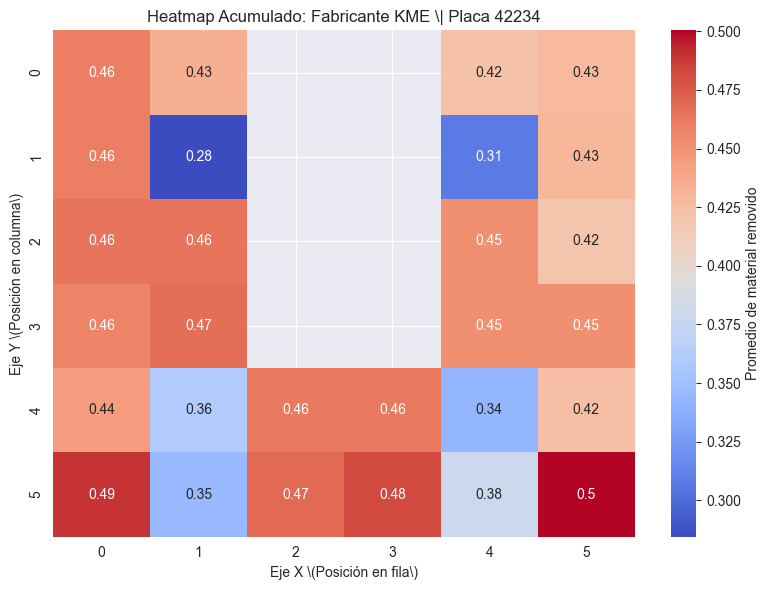

Generando heatmap para placa 42233


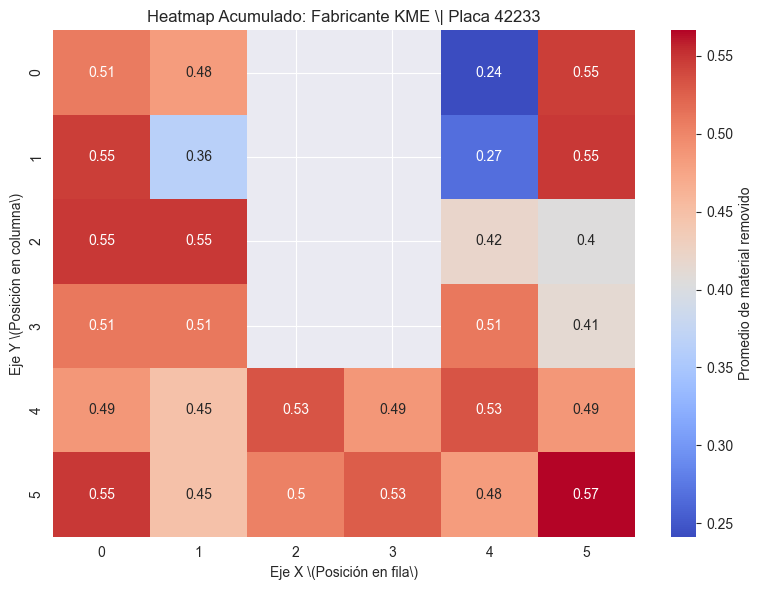

Generando heatmap para placa 44740


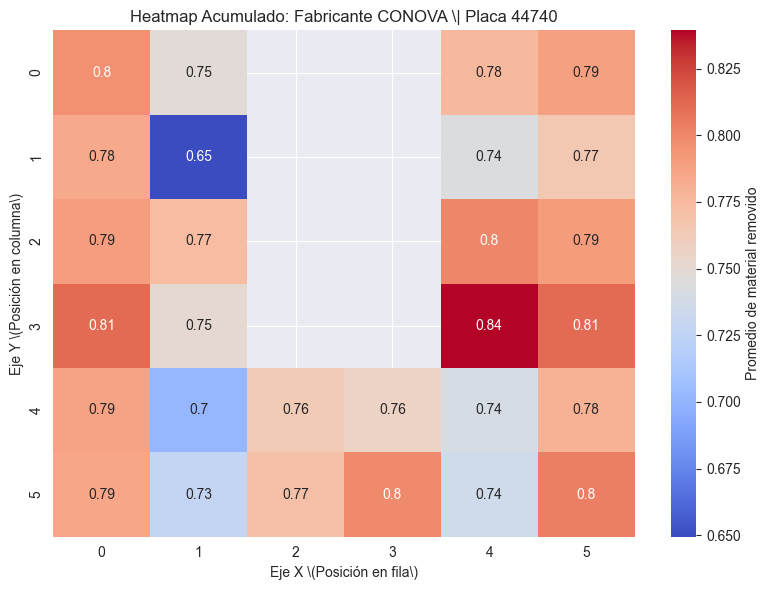

Generando heatmap para placa 44739


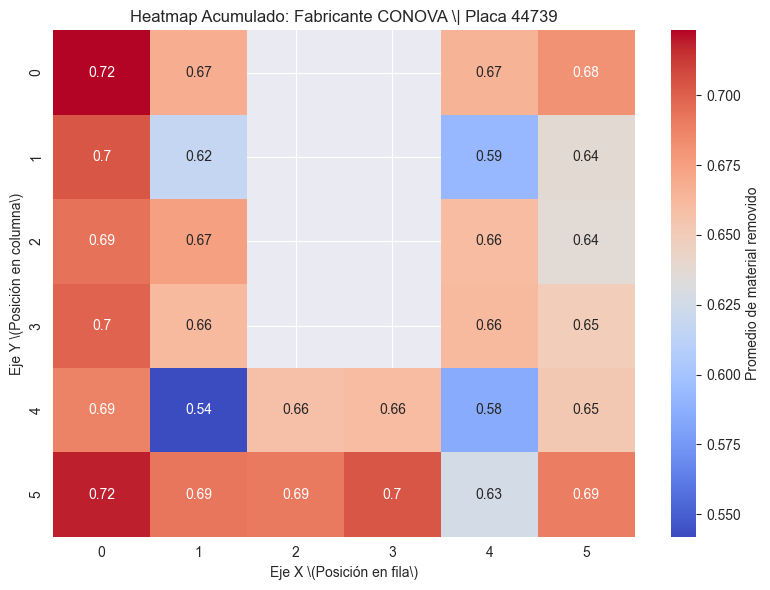

Generando heatmap para placa 43361


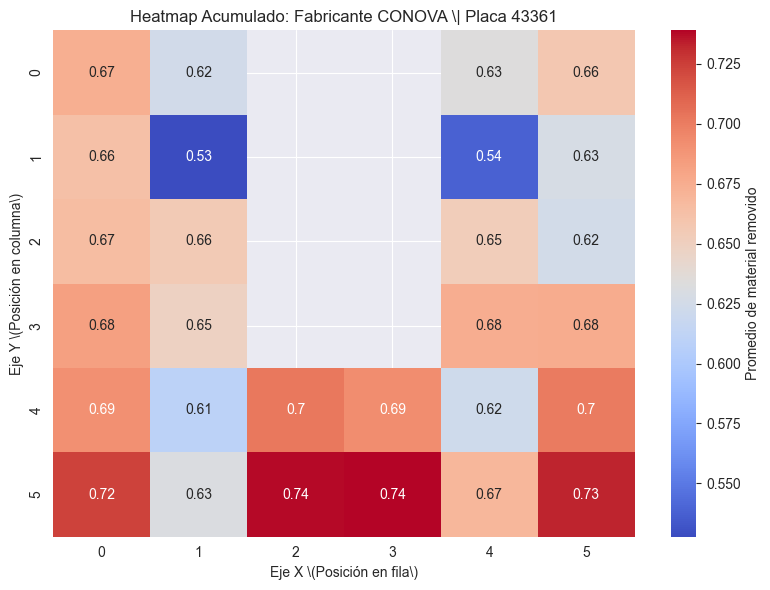

Generando heatmap para placa 43362


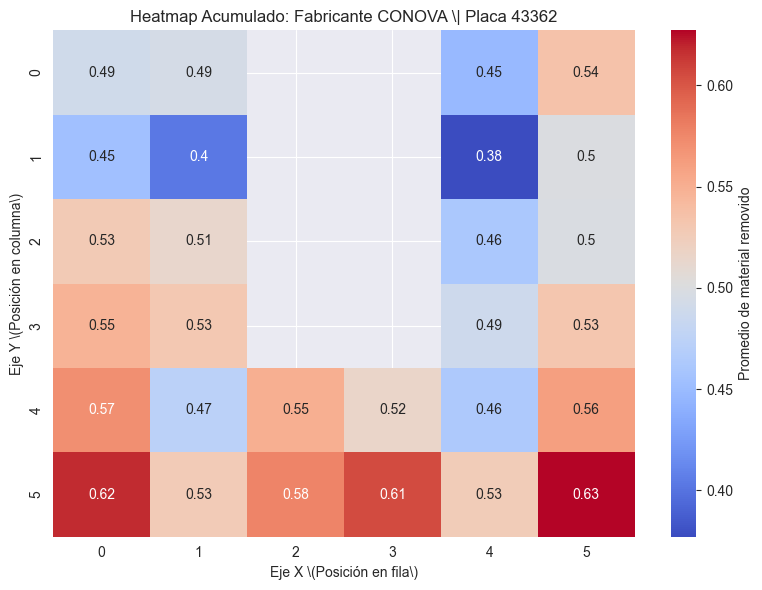

Generando heatmap para placa 44053


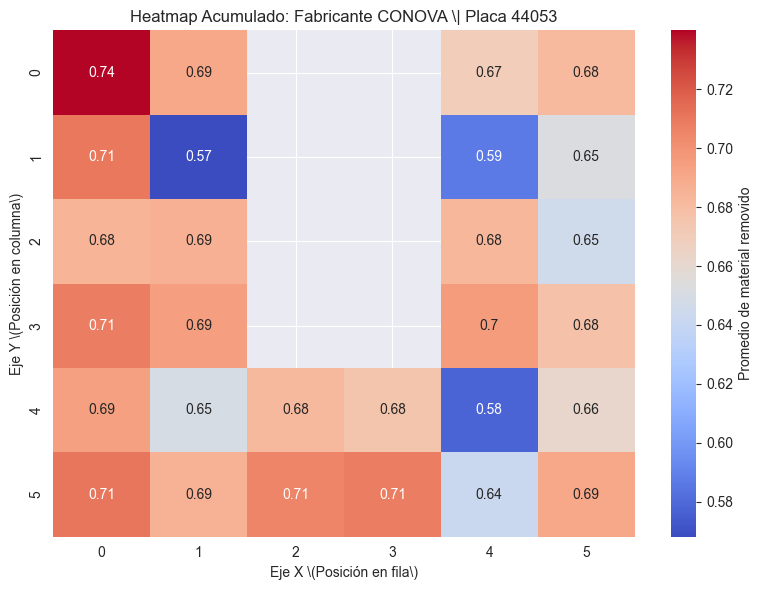

Generando heatmap para placa 44052


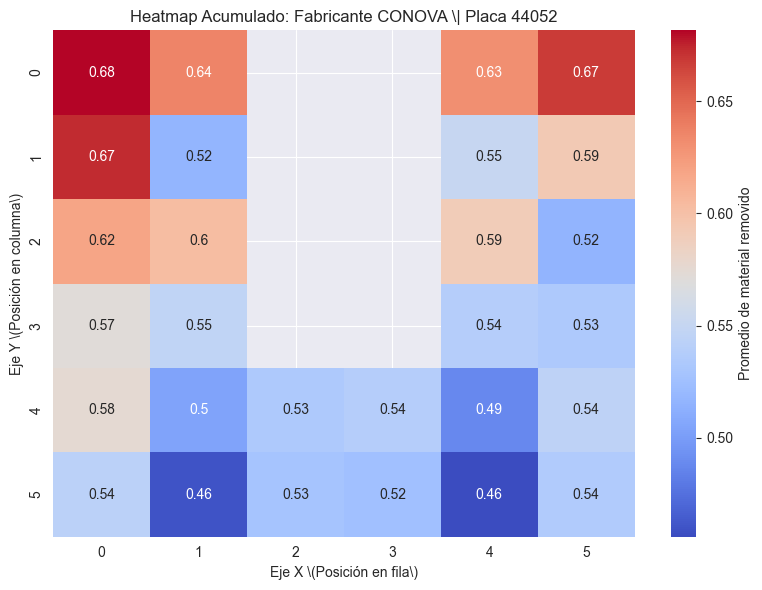

Generando heatmap para placa LTERNIUMB01-11


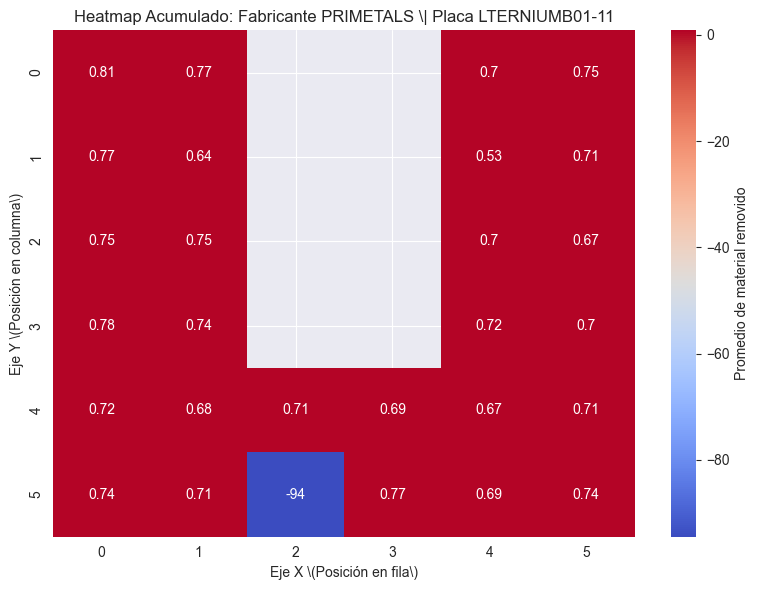

Generando heatmap para placa LTERNIUMB01-4


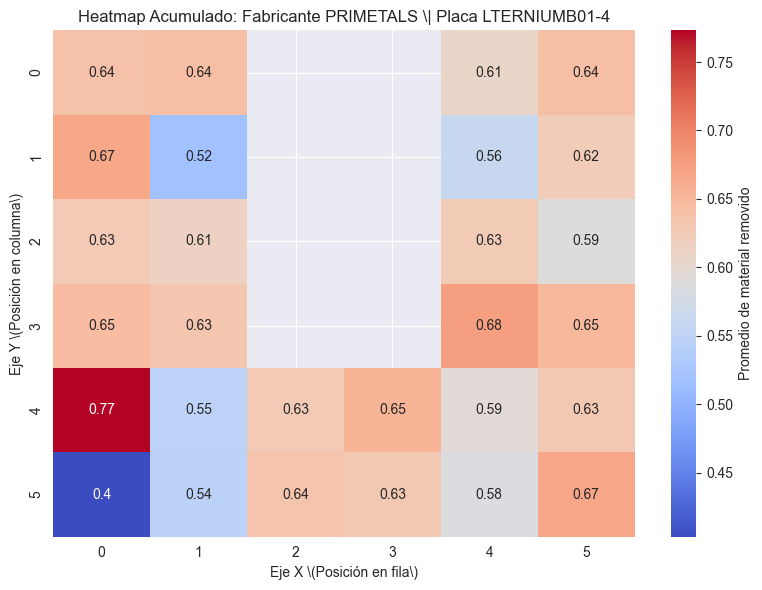

Generando heatmap para placa LTERNIUM B01-15


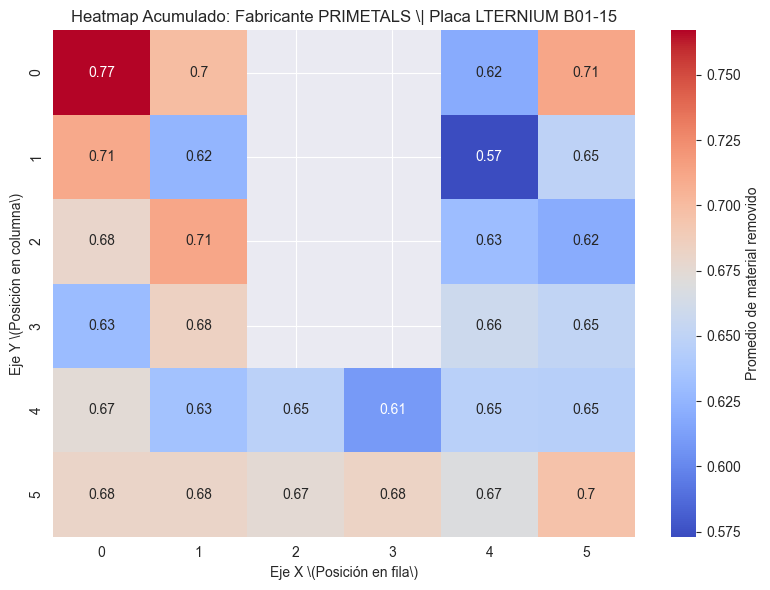

Generando heatmap para placa LTERNIUM B01-18


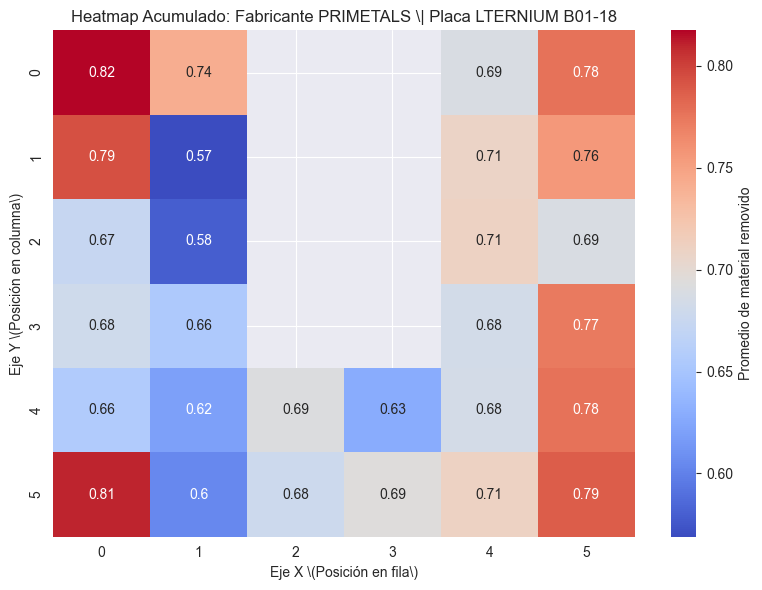

Generando heatmap para placa 44086


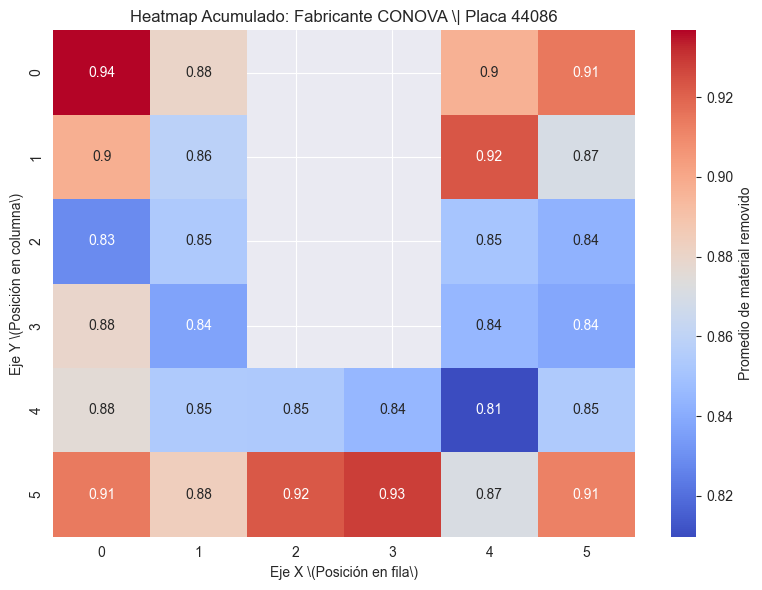

Generando heatmap para placa 44085


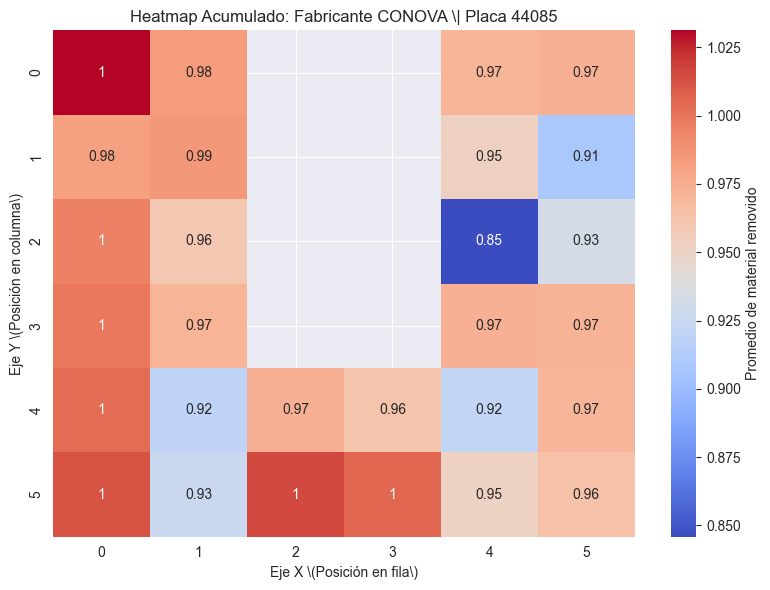

Generando heatmap para placa LTERNIUM B01-13


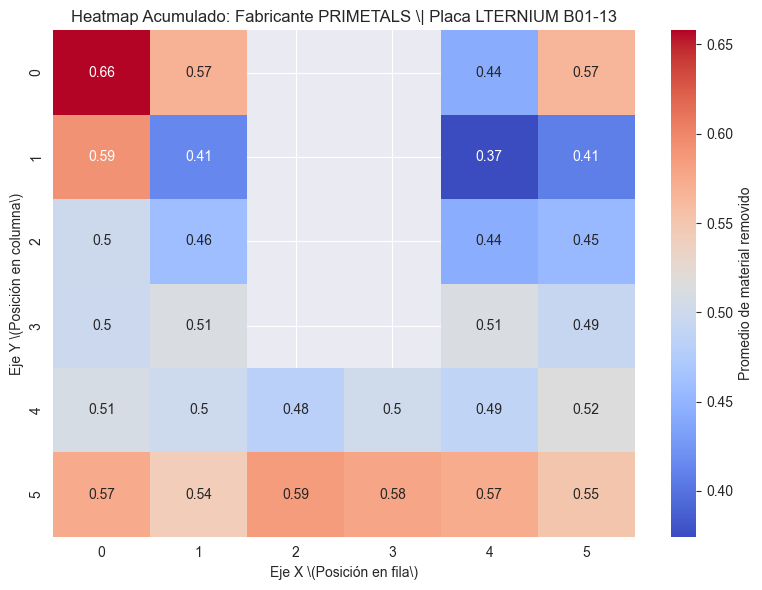

Generando heatmap para placa LTERNIUM B01-16


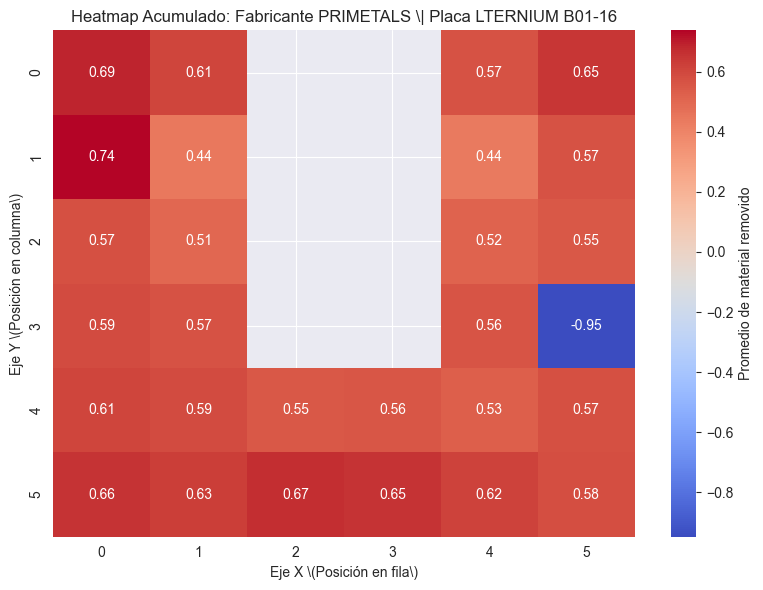

Generando heatmap para placa 34511


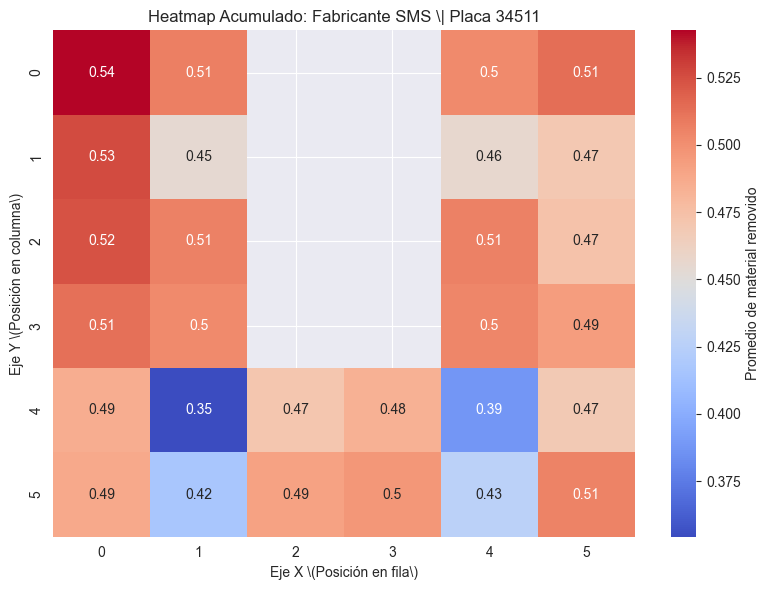

Generando heatmap para placa 39512


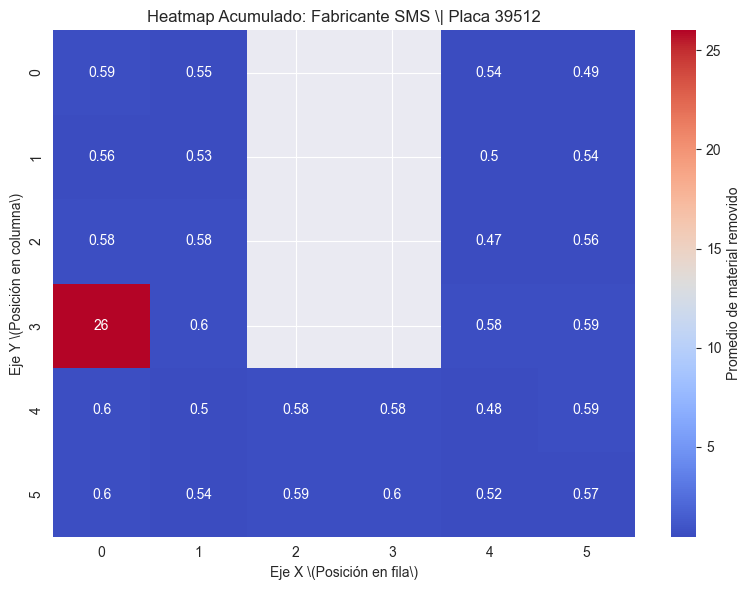

Generando heatmap para placa 44860


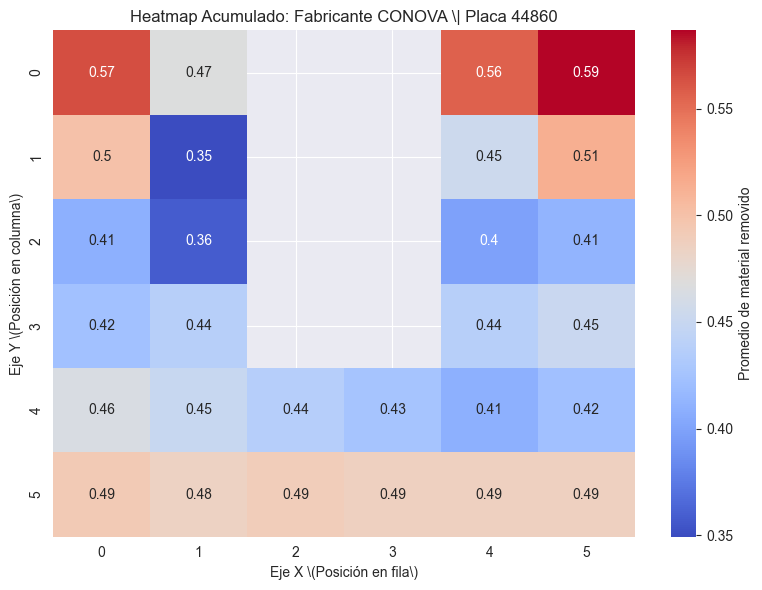

Generando heatmap para placa 44859


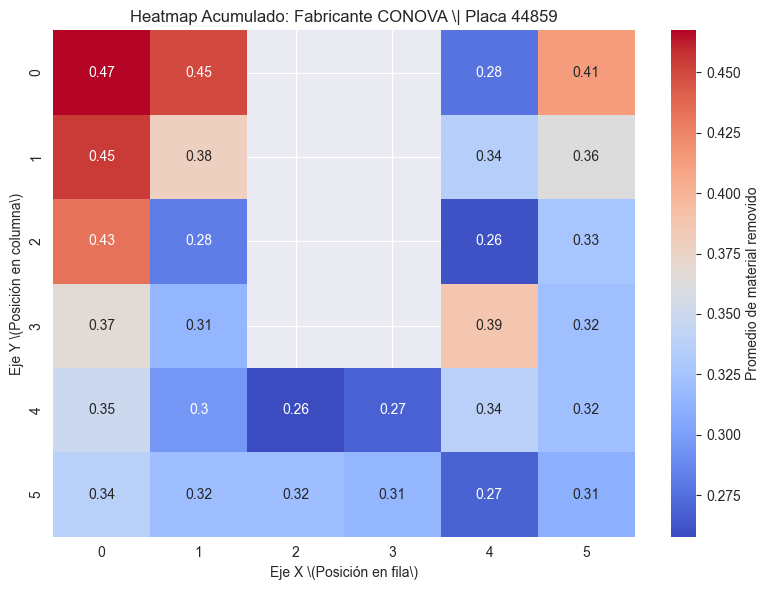

Generando heatmap para placa 44856


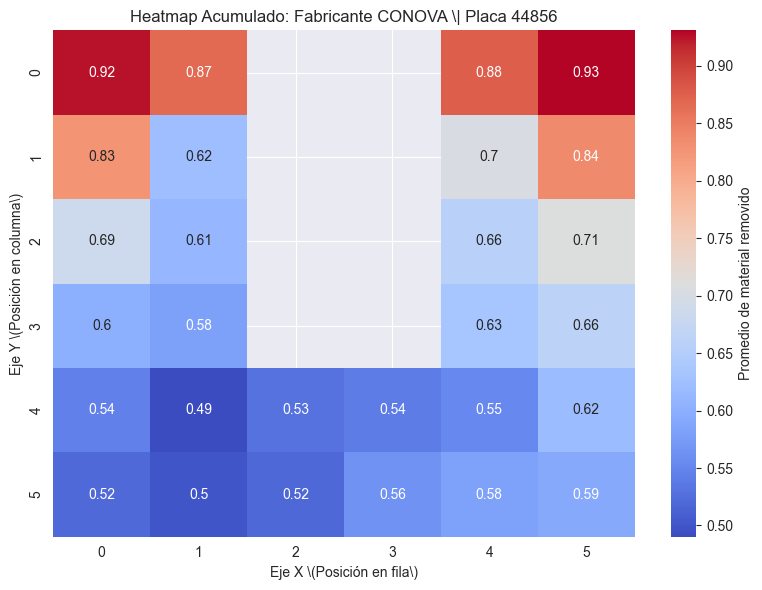

Generando heatmap para placa 45620


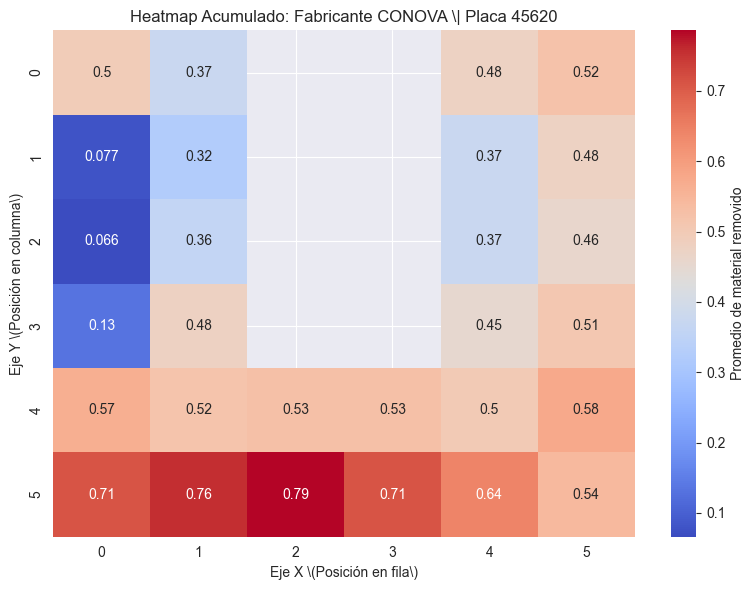

In [15]:
for placa in df['No. Placa'].unique():
    print(f"Generando heatmap para placa {placa}")
    df_placa = df[df['No. Placa'] == placa]
    generar_heatmap_acumulado(df_placa)

In [16]:
placa_col = 'No. Placa'  # Make sure this matches exactly your column name

no_placa_input = 39512

filtered_df = df[df[placa_col] == no_placa_input]

filter = ['I19', 'F19']
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(filter)]

filtered_df['Total'] = filtered_df['I19'] - filtered_df['F19']

filtered_df

,I19,F19,Total
71,164.30752,163.71570,0.59182
73,164.02304,163.72332,0.29972
75,417.18992,162.64636,254.54356
77,162.63874,162.00120,0.63754
79,161.99104,161.40430,0.58674
81,161.45764,161.08934,0.36830
83,160.20542,159.62122,0.58420
85,159.50184,158.72460,0.77724
87,158.68650,158.09976,0.58674
89,157.57144,156.57322,0.99822


In [ ]:
placa_col = 'No. Placa'

no_placa_input = "LTERNIUMB01-11"

filtered_df = df[df[placa_col] == no_placa_input]

filter = ['I33', 'F33']
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(filter)]

filtered_df['Total'] = filtered_df['I33'] - filtered_df['F33']

filtered_df

In [20]:
placa_col = 'No. Placa'

no_placa_input = "LTERNIUM B01-16"

filtered_df = df[df[placa_col] == no_placa_input]

filter = ['I24', 'F24']
filtered_df = filtered_df.loc[:, filtered_df.columns.isin(filter)]

filtered_df['Total'] = filtered_df['I24'] - filtered_df['F24']

filtered_df

,I24,F24,Total
65,164.50056,164.07892,0.42164
67,163.88080,171.12996,-7.24916
69,163.53790,162.24250,1.29540
31,164.35070,163.99256,0.35814
33,163.74872,163.31438,0.43434


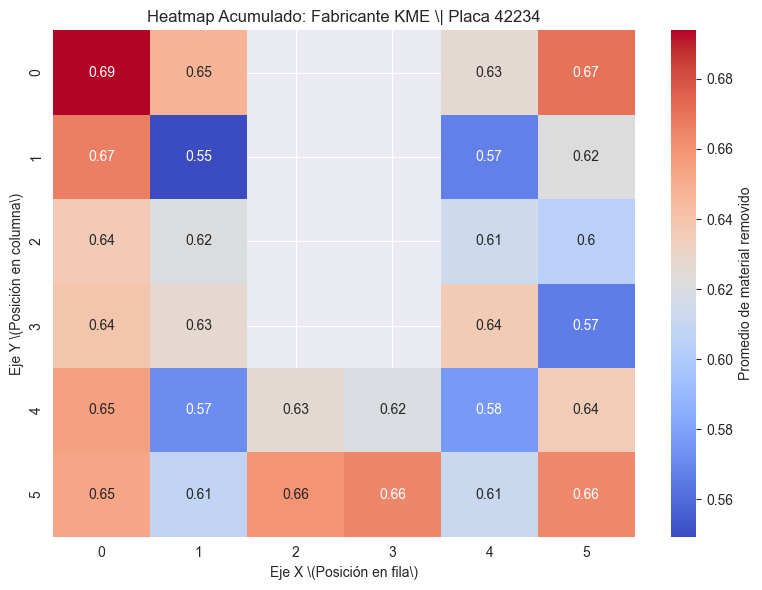

In [18]:
excluded_plates = [39512, "LTERNIUMB01-11"]
df_filtered = df[~df["No. Placa"].isin(excluded_plates)]
generar_heatmap_acumulado(df_filtered, name='total')